<a href="https://colab.research.google.com/github/m2masari/ML/blob/master/telco_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
import warnings
from pylab import rcParams
warnings.filterwarnings("ignore")

In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
import os
os.chdir('/content/drive/My Drive/assesment/Velox')

In [0]:
ls

Telco_Churn_Case.csv  Velox.ipynb


In [0]:
df = pd.read_csv('Telco_Churn_Case.csv', sep=';')
df.head()

,AGE1,CHILDREN,CHURN,MARRYYES,MARRYNO,MARRYUN,INCOME,OCCSTUD,OCCSELF,OCCRET,OCCPROF,OCCHMKR,OCCCRFT,OCCCLER,NEWCELLY,MONTHS,MODELS,PHONES,PCOWN,CALLWAIT,MOU,INCALLS,EQPDAYS,DROPVCE,CUSTOMER,ROAM,REVENUE,RECCHRGE,PEAKVCE,OUTCALLS
0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,22,3.0,3.0,0,2.666667,185.75,0.000000,280.0,2.000000,1033384,0.00,37.5100,27.5725,48.666667,0.000000
1,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,25,5.0,7.0,0,102.000000,3294.25,181.666667,51.0,124.000000,1022818,0.00,191.6100,114.1025,800.666667,240.333333
2,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,7,1.0,1.0,0,0.000000,2582.00,1.000000,188.0,9.333333,1095330,22.47,187.7200,122.4925,386.000000,46.666667
3,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,9,1.0,1.0,0,0.666667,278.75,5.666667,243.0,7.333333,1092012,0.00,54.6325,64.4275,32.666667,24.000000
4,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,9,1.0,1.0,0,0.000000,260.75,6.333333,243.0,13.666667,1092009,0.00,50.3000,33.7000,33.000000,30.666667


In [0]:
df.isnull().sum(axis=0)

AGE1        1244
CHILDREN       0
CHURN          0
MARRYYES       0
MARRYNO        0
MARRYUN        0
INCOME         0
OCCSTUD        0
OCCSELF        0
OCCRET         0
OCCPROF        0
OCCHMKR        0
OCCCRFT        0
OCCCLER        0
NEWCELLY       0
MONTHS         0
MODELS         1
PHONES         1
PCOWN          0
CALLWAIT       0
MOU          216
INCALLS        0
EQPDAYS        1
DROPVCE        0
CUSTOMER       0
ROAM         216
REVENUE      216
RECCHRGE     216
PEAKVCE        0
OUTCALLS       0
dtype: int64

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71047 entries, 0 to 71046
Data columns (total 30 columns):
AGE1        69803 non-null float64
CHILDREN    71047 non-null int64
CHURN       71047 non-null int64
MARRYYES    71047 non-null int64
MARRYNO     71047 non-null int64
MARRYUN     71047 non-null int64
INCOME      71047 non-null int64
OCCSTUD     71047 non-null int64
OCCSELF     71047 non-null int64
OCCRET      71047 non-null int64
OCCPROF     71047 non-null int64
OCCHMKR     71047 non-null int64
OCCCRFT     71047 non-null int64
OCCCLER     71047 non-null int64
NEWCELLY    71047 non-null int64
MONTHS      71047 non-null int64
MODELS      71046 non-null float64
PHONES      71046 non-null float64
PCOWN       71047 non-null int64
CALLWAIT    71047 non-null float64
MOU         70831 non-null float64
INCALLS     71047 non-null float64
EQPDAYS     71046 non-null float64
DROPVCE     71047 non-null float64
CUSTOMER    71047 non-null int64
ROAM        70831 non-null float64
REVENUE     708

In [0]:
df.drop(['CUSTOMER'], axis=1, inplace=True)

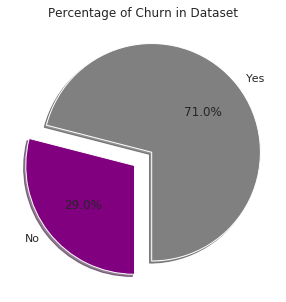

In [0]:
# Data to plot
sizes = df['CHURN'].value_counts(sort = True)
colors = ["grey","purple"] 
rcParams['figure.figsize'] = 5,5
labels = 'Yes', 'No'
explode = (0.1, 0.1)
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=270,)
plt.title('Percentage of Churn in Dataset')
plt.show()

In [0]:
sizes

0    50438
1    20609
Name: CHURN, dtype: int64

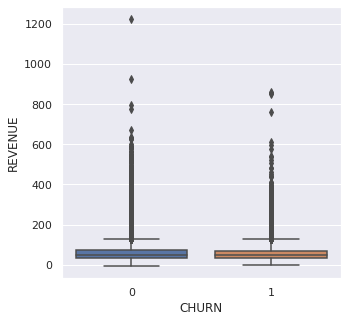

In [0]:
import seaborn as sns

sns.boxplot(x = df.CHURN, y = df.REVENUE)

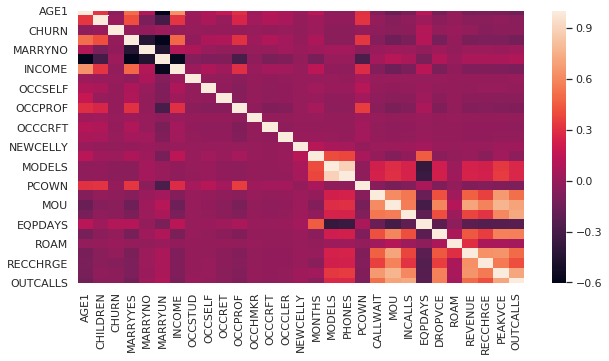

In [0]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr())

In [0]:
df=df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69592 entries, 0 to 71046
Data columns (total 29 columns):
AGE1        69592 non-null float64
CHILDREN    69592 non-null int64
CHURN       69592 non-null int64
MARRYYES    69592 non-null int64
MARRYNO     69592 non-null int64
MARRYUN     69592 non-null int64
INCOME      69592 non-null int64
OCCSTUD     69592 non-null int64
OCCSELF     69592 non-null int64
OCCRET      69592 non-null int64
OCCPROF     69592 non-null int64
OCCHMKR     69592 non-null int64
OCCCRFT     69592 non-null int64
OCCCLER     69592 non-null int64
NEWCELLY    69592 non-null int64
MONTHS      69592 non-null int64
MODELS      69592 non-null float64
PHONES      69592 non-null float64
PCOWN       69592 non-null int64
CALLWAIT    69592 non-null float64
MOU         69592 non-null float64
INCALLS     69592 non-null float64
EQPDAYS     69592 non-null float64
DROPVCE     69592 non-null float64
ROAM        69592 non-null float64
REVENUE     69592 non-null float64
RECCHRGE    6

In [0]:
df = pd.read_csv('Telco_Churn_Case.csv', sep=';')
df.drop(['CUSTOMER'], axis=1, inplace=True)
df=df.dropna()

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
df["CHURN"] = df["CHURN"].astype(int)
Y = data["CHURN"].values
X = data.drop(labels = ["CHURN"],axis = 1)
df = df.fillna(df.median(axis=0))
X_train, X_test, y_train, y_test = train_test_split(np.nan_to_num(X), Y, test_size=0.3, random_state=101)

In [0]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

In [0]:
model.score(X_test, y_test)

0.708843537414966

AxesSubplot(0.125,0.125;0.775x0.755)


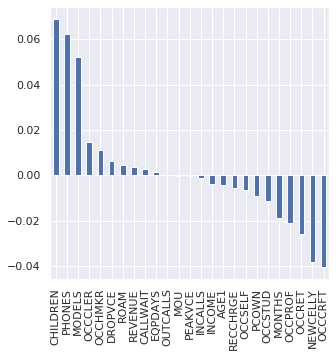

In [0]:
weights = pd.Series(model.coef_[0],
                 index=X.columns.values)
print (weights.sort_values(ascending = False)[:25].plot(kind='bar'))